# Deep Neural Networks
You should build an end-to-end machine learning pipeline using a deep learning model. In particular, you should do the following:
- Load the `fashion mnist` dataset from [TensorFlow](https://www.tensorflow.org/tutorials/keras/classification). The loaded dataset is already split into training and test sets. 
- Build an end-to-end machine learning pipeline, including a [deep learning](https://www.tensorflow.org/tutorials/keras/classification) model.
- Optimize your pipeline by validating your design decisions. 
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### **Importing the Fashion MNIST dataset**

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [116]:
fashion_mnist.dtype

AttributeError: module 'keras.api._v2.keras.datasets.fashion_mnist' has no attribute 'dtype'

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **Explore the data**

In [23]:
train_images.shape

(60000, 28, 28)

In [27]:
len(train_labels)

60000

In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [33]:
train_images.shape

(60000, 28, 28)

### **Preprocess the data**

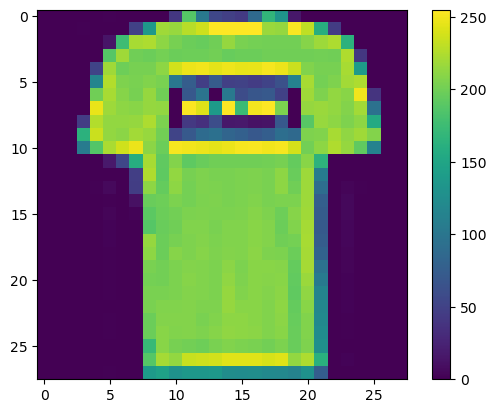

In [41]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False )
plt.show()

In [43]:
train_images = train_images / 255.0

test_images = test_images / 255.0

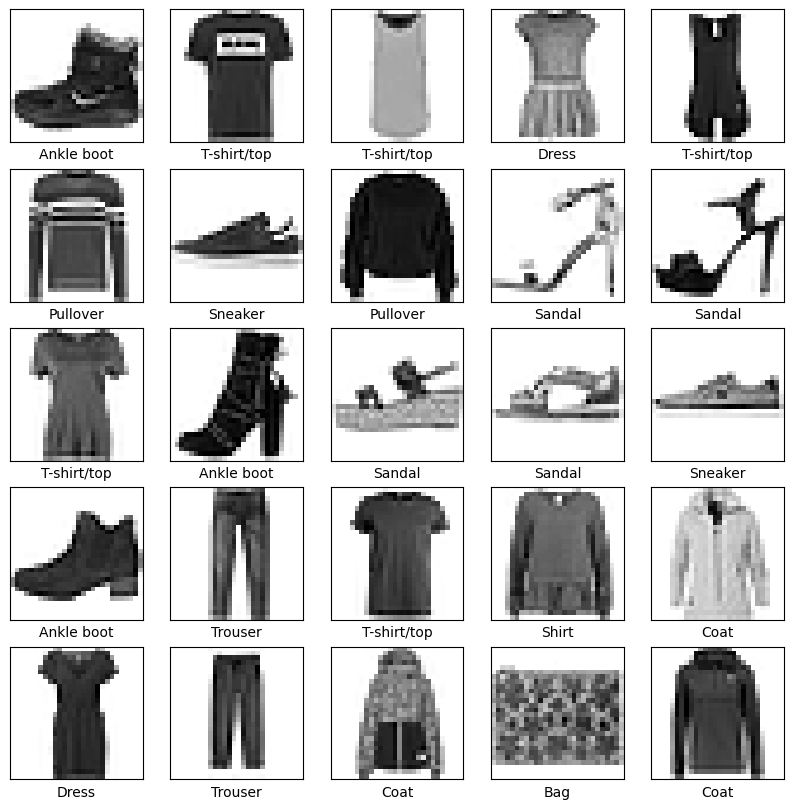

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### **Compile the model**

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Train the model**

##### ***Feed the model***

In [70]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.2288 - accuracy: 0.9153
Epoch 2/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.2231 - accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.2151 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 2s 820us/step - loss: 0.2100 - accuracy: 0.9213
Epoch 5/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.2024 - accuracy: 0.9241
Epoch 6/10
1875/1875 [==============================] - 1s 751us/step - loss: 0.1981 - accuracy: 0.9261
Epoch 7/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.1917 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.1851 - accuracy: 0.9302
Epoch 9/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.1812 - accuracy: 0.9322
Epoch 10/10
1875/1875 [==============================] - 2s 851u

##### ***Evaluate the accuracy***

In [73]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3426 - accuracy: 0.8883 - 366ms/epoch - 1ms/step

Test accuracy: 0.8883000016212463


##### ***Make Prediction***

In [77]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [79]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 488us/step


In [85]:
predictions[0]

array([4.7262177e-02, 2.4359821e-09, 8.0697816e-03, 5.8191490e-05,
       1.0208678e-04, 2.7545784e-05, 9.4447988e-01, 4.1001915e-08,
       1.7032629e-07, 7.0935286e-08], dtype=float32)

In [87]:
np.argmax(predictions[0])

9

In [89]:
test_labels[0]

9

In [91]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

##### ***Verify predictions***

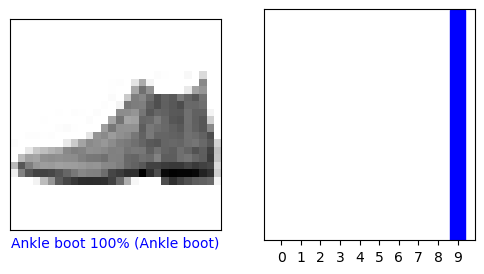

In [94]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

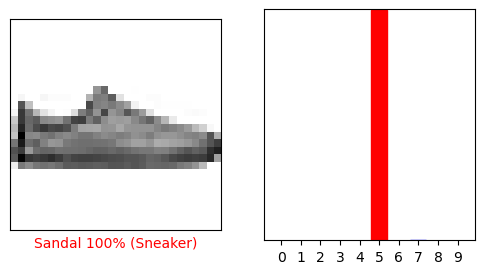

In [96]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

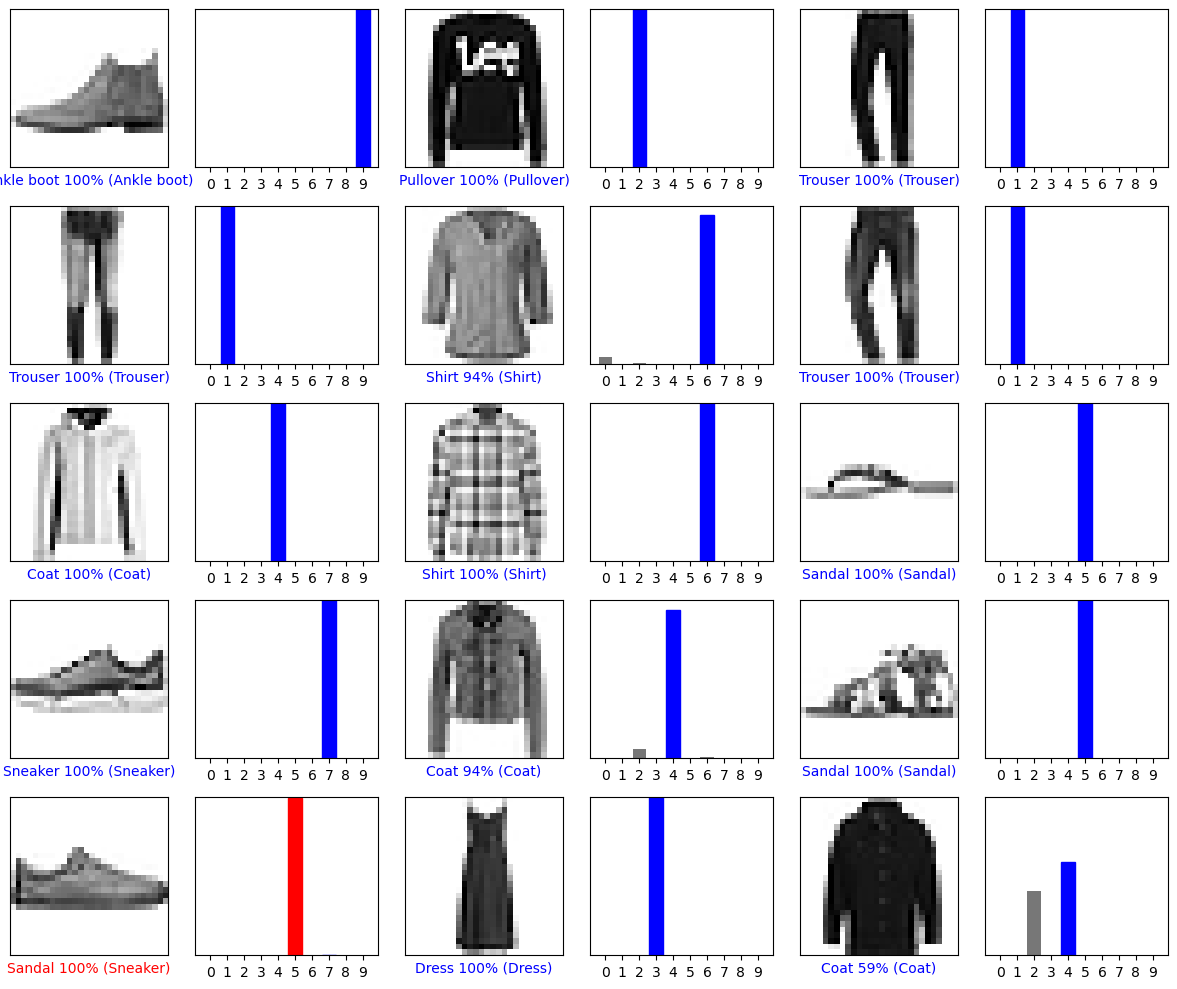

In [98]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### **Use the trained model**

In [102]:
img = test_images[1]

print(img.shape)

(28, 28)


In [106]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [108]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 104ms/step
[[1.51018277e-04 1.05743741e-15 9.98948991e-01 1.02555534e-10
  6.28336507e-04 3.33818200e-08 2.71669647e-04 1.21937758e-08
  8.58980942e-12 1.68946693e-12]]


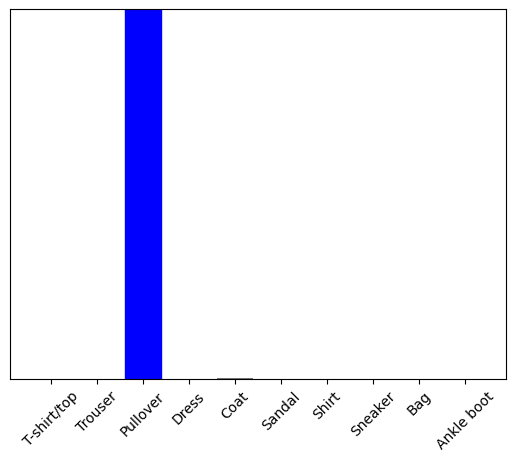

In [112]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [114]:
np.argmax(predictions_single[0])

2